# Project 6: Convolution, inner product, and image processing revisited

Image dimensions: 1365 x 1024


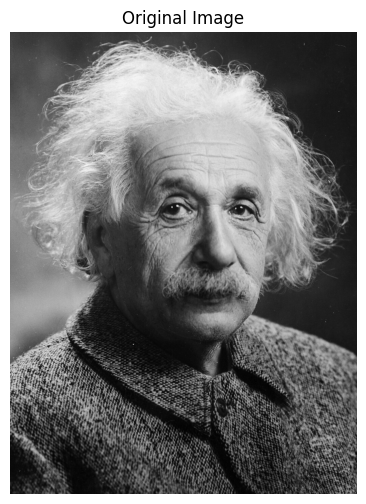

In [1]:
#Q1.Load the file einstein.jpg and save the resulting matrix as ImJPG

import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
ImJPG = cv2.imread(r"einstein.jpg")
# Convert to RGB (OpenCV loads images in BGR format)
ImJPG = cv2.cvtColor(ImJPG, cv2.COLOR_BGR2RGB)
# Get dimensions
m, n, _ = ImJPG.shape
# Display image dimensions
print(f"Image dimensions: {m} x {n}")
# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(ImJPG)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [2]:
#Q2.Introduce some noise into the image

# Generate noise matrix with the same dimensions as ImJPG
noise = 50 * (np.random.rand(m, n, 3) - 0.5)

# Add noise to each channel of the image
ImJPG_Noisy = np.double(ImJPG) + noise
"""
plt.imshow(ImJPG_Noisy)
plt.axis("off")
plt.title("Noisy Image")
plt.show()
"""

'\nplt.imshow(ImJPG_Noisy)\nplt.axis("off")\nplt.title("Noisy Image")\nplt.show()\n'

**Q3. common operations on images done with convolution filters: smoothing and sharpening.**
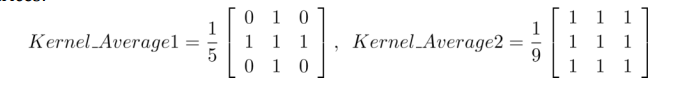

In [3]:
#Q4. Type in the matrices Kernel Average1 and Kernel Average2.
Kernel_Average1 = np.array([[0, 1, 0],
 [1, 1, 1],
 [0, 1, 0]]) / 5
Kernel_Average2 = np.array([[1, 1, 1],
 [1, 1, 1],
 [1, 1, 1]]) / 9

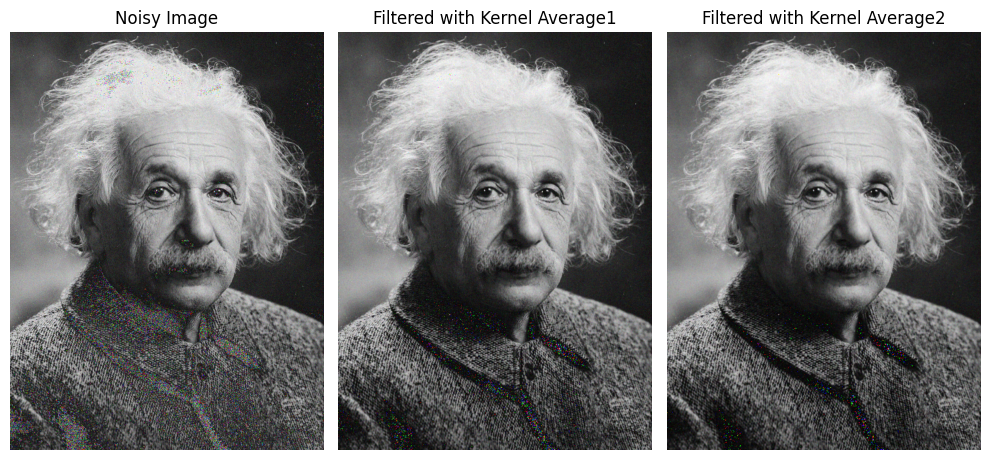

In [4]:
#Q5. Apply the filters to the noisy image

from scipy.signal import convolve2d

# Initialize arrays to store filtered results
ImJPG_Average1 = np.zeros_like(ImJPG_Noisy, dtype=np.float64)
ImJPG_Average2 = np.zeros_like(ImJPG_Noisy, dtype=np.float64)

# Apply the convolution filter to each channel separately
for channel in range(3):
    ImJPG_Average1[:, :, channel] = convolve2d(
        ImJPG_Noisy[:, :, channel], Kernel_Average1, mode='same', boundary='symm'
    )
    ImJPG_Average2[:, :, channel] = convolve2d(
        ImJPG_Noisy[:, :, channel], Kernel_Average2, mode='same', boundary='symm'
    )

# Convert the results back to uint8 format for display
ImJPG_Average1 = np.uint8(ImJPG_Average1)
ImJPG_Average2 = np.uint8(ImJPG_Average2)

# Display the resulting images
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(np.uint8(ImJPG_Noisy))
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Average1)
plt.title('Filtered with Kernel Average1')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Average2)
plt.title('Filtered with Kernel Average2')
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
#Q6.Alternative blurring filter, Gaussian blur

# Define the Gaussian blur kernel matrix
Kernel_Gauss = np.array([[0, 1, 0],
[1, 4, 1],
[0, 1, 0]]) / 8
print("Kernel Gauss:")
print(Kernel_Gauss)

Kernel Gauss:
[[0.    0.125 0.   ]
 [0.125 0.5   0.125]
 [0.    0.125 0.   ]]


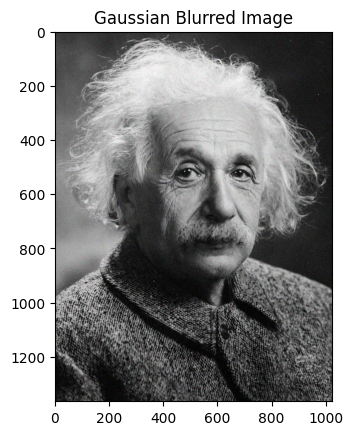

In [6]:
#Q7. Perform the convolution using the function conv2 and Kernel Gauss and save the resulting array as ImJPG Gauss. Display the result in a new window

# Initialize arrays to store filtered results
ImJPG_Gauss = np.zeros_like(ImJPG_Noisy, dtype=np.float64)

#Apply the convolution filter to each channel separately
for channel in range(3):
 ImJPG_Gauss[:, :, channel] = convolve2d(ImJPG_Noisy[:, :, channel], Kernel_Gauss, mode='same', boundary='symm')

# Convert the results back to uint8 format for display
ImJPG_Gauss = np.uint8(np.clip(ImJPG_Gauss, 0, 255))

# Display the resulting image
plt.figure()
plt.imshow(ImJPG_Gauss)
plt.title('Gaussian Blurred Image')
plt.show()

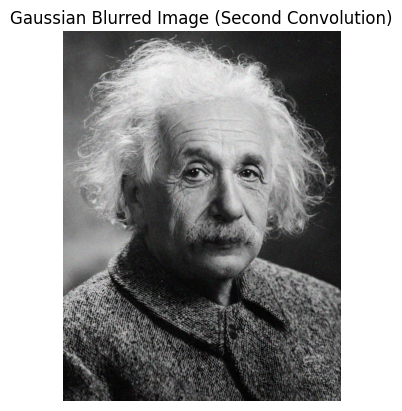

In [7]:
#Q8.Perform Gaussian blur convolution on ImJPG_Gauss

# Perform Gaussian blur convolution on ImJPG_Gauss
ImJPG_Gauss2 = np.zeros_like(ImJPG_Gauss, dtype=np.float64)
for channel in range(3):
 ImJPG_Gauss2[:, :, channel] = convolve2d(ImJPG_Gauss[:, :, channel], Kernel_Gauss, mode='same', boundary='symm')
ImJPG_Gauss2 = np.uint8(np.clip(ImJPG_Gauss2, 0, 255))

# Display the resulting image
plt.figure()
plt.imshow(ImJPG_Gauss2)
plt.title('Gaussian Blurred Image (Second Convolution)')
plt.axis('off')
plt.show()

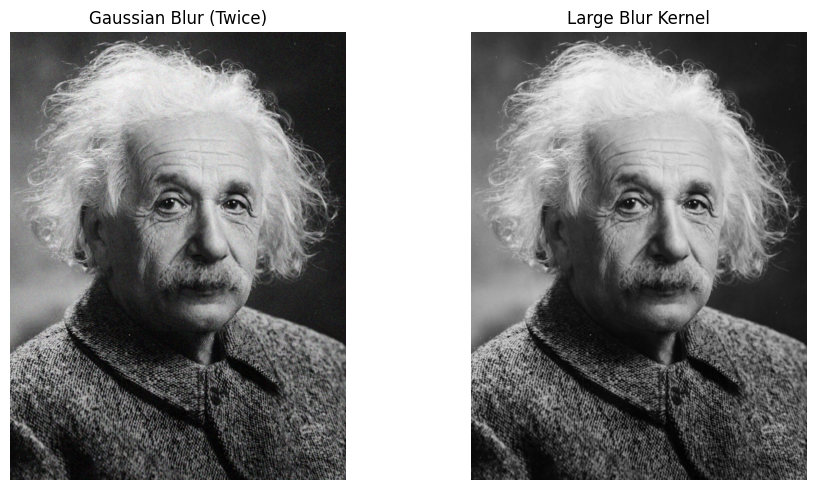

In [8]:
#Q9. Apply the kernel Kernel Large to the matrix ImJPG

# Define the larger blur kernel (Kernel Large)
Kernel_Large = np.array([[0, 1, 2, 1, 0],
[1, 4, 8, 4, 1],
[2, 8, 16, 8, 2],
[1, 4, 8, 4, 1],
[0, 1, 2, 1, 0]]) / 80

# Apply the larger blur kernel to the image
ImJPG_Large = np.zeros_like(ImJPG, dtype=np.float64)
for channel in range(3):
 ImJPG_Large[:, :, channel] = convolve2d(ImJPG[:, :, channel], Kernel_Large, mode='same', boundary='symm')
ImJPG_Large = np.uint8(np.clip(ImJPG_Large, 0, 255))

# Display the resulting images
plt.figure(figsize=(10, 5))

# Display Gaussian blurred image (second convolution)
plt.subplot(1, 2, 1)
plt.imshow(ImJPG_Gauss2)
plt.title('Gaussian Blur (Twice)')
plt.axis('off')

# Display larger blur image
plt.subplot(1, 2, 2)
plt.imshow(ImJPG_Large)
plt.title('Large Blur Kernel')
plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
#Q10.The sharpening of an image with a convolution filter

# Define the sharpening kernels
Kernel_Sharp1 = np.array([[0, -1, 0],
 [-1, 5, -1],
 [0, -1, 0]])
Kernel_Sharp2 = np.array([[-1, -1, -1],
 [-1, 9, -1],
 [-1, -1, -1]])
# Display the kernels (optional)
print("Kernel Sharp1:\n", Kernel_Sharp1)
print("\nKernel Sharp2:\n", Kernel_Sharp2)

Kernel Sharp1:
 [[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]

Kernel Sharp2:
 [[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


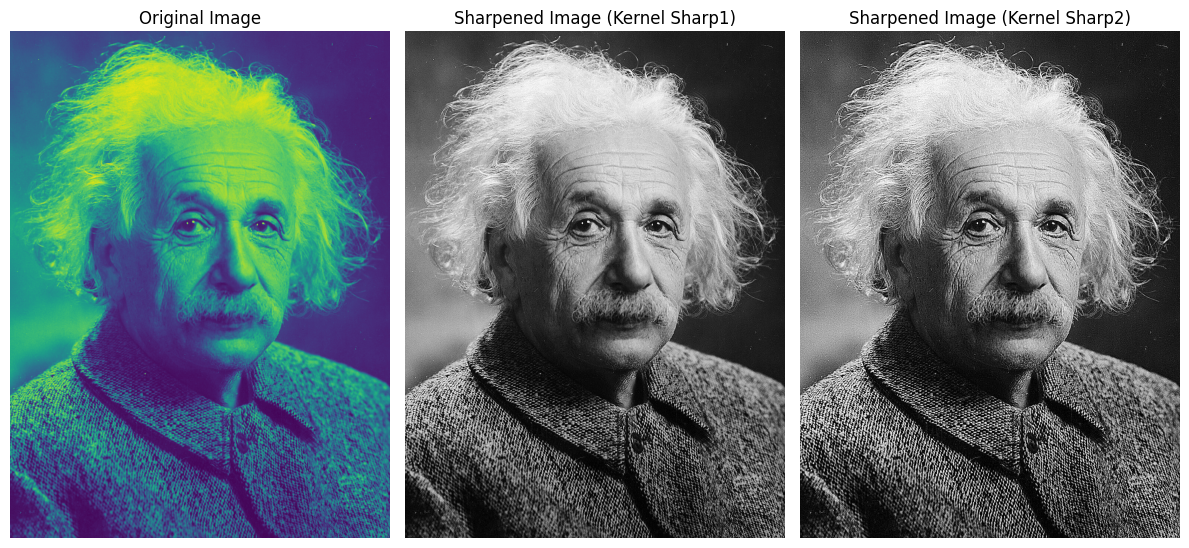

In [10]:
#Q11. Perform the convolution of the original image ImJPG

# Check the dimensions of ImJPG
if ImJPG.ndim == 3:
 # Convert RGB to grayscale if necessary
 ImJPG = np.mean(ImJPG, axis=2).astype(np.uint8)

# Define the sharpening kernels
Kernel_Sharp1 = np.array([[0, -1, 0],
 [-1, 5, -1],
 [0, -1, 0]])
Kernel_Sharp2 = np.array([[-1, -1, -1],
 [-1, 9, -1],
 [-1, -1, -1]])

# Apply convolution with Kernel_Sharp1
ImJPG_Sharp1 = convolve2d(ImJPG, Kernel_Sharp1, mode='same', boundary='symm')
# Apply convolution with Kernel_Sharp2
ImJPG_Sharp2 = convolve2d(ImJPG, Kernel_Sharp2, mode='same', boundary='symm')

# Convert the results back to uint8 format for display
ImJPG_Sharp1 = np.clip(ImJPG_Sharp1, 0, 255).astype(np.uint8)
ImJPG_Sharp2 = np.clip(ImJPG_Sharp2, 0, 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG)
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(ImJPG_Sharp1, cmap='gray')
plt.title('Sharpened Image (Kernel Sharp1)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Sharp2, cmap='gray')
plt.title('Sharpened Image (Kernel Sharp2)')
plt.axis('off')
plt.tight_layout()
plt.show()

**Q12.Sobel filters**

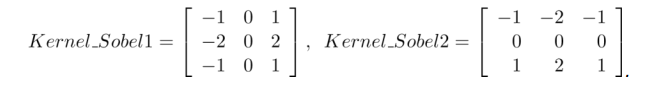

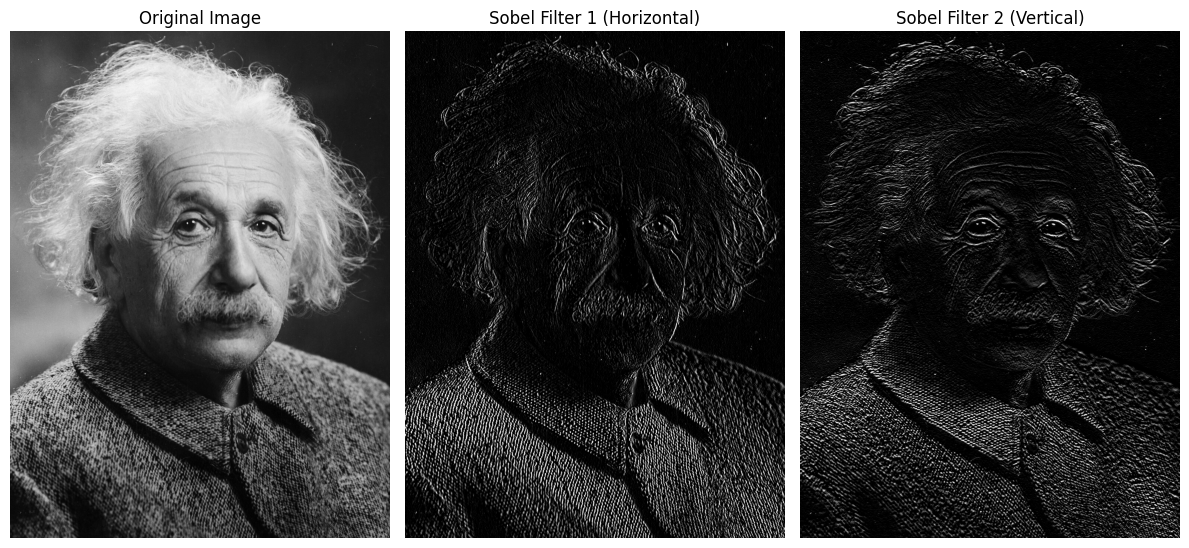

In [11]:
#Q13. Perform the convolution of the original image ImJPG with the Sobel kernels

# Check the dimensions of ImJPG
if ImJPG.ndim == 3:
 # Convert RGB to grayscale if necessary
 ImJPG = np.mean(ImJPG, axis=2).astype(np.uint8)

# Define Sobel kernels
Kernel_Sobel1 = np.array([[-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]])
Kernel_Sobel2 = np.array([[-1, -2, -1],
 [0, 0, 0],
 [1, 2, 1]])

# Perform convolution with Sobel kernels
ImJPG_Sobel1 = convolve2d(ImJPG, Kernel_Sobel1, mode='same', boundary='symm')
ImJPG_Sobel2 = convolve2d(ImJPG, Kernel_Sobel2, mode='same', boundary='symm')

# Clip and convert the results back to uint8 for display
ImJPG_Sobel1 = np.uint8(np.clip(ImJPG_Sobel1, 0, 255))
ImJPG_Sobel2 = np.uint8(np.clip(ImJPG_Sobel2, 0, 255))

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(ImJPG, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)

plt.imshow(ImJPG_Sobel1, cmap='gray')
plt.title('Sobel Filter 1 (Horizontal)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(ImJPG_Sobel2, cmap='gray')
plt.title('Sobel Filter 2 (Vertical)')
plt.axis('off')
plt.tight_layout()
plt.show()


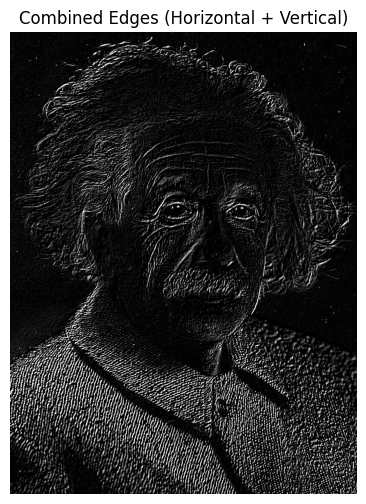

In [12]:
#Q14. Create a combined image with both horizontal and vertical edges by summing up the matrices
# Check if the image is RGB and convert to grayscale if necessary
if ImJPG.ndim == 3:
 ImJPG = np.mean(ImJPG, axis=2).astype(np.uint8)

# Define Sobel kernels
Kernel_Sobel1 = np.array([[-1, 0, 1],
 [-2, 0, 2],
 [-1, 0, 1]])
Kernel_Sobel2 = np.array([[-1, -2, -1],
 [0, 0, 0],
 [1, 2, 1]])

# Perform convolution with Sobel kernels
ImJPG_Sobel1 = convolve2d(ImJPG, Kernel_Sobel1, mode='same', boundary='symm')
ImJPG_Sobel2 = convolve2d(ImJPG, Kernel_Sobel2, mode='same', boundary='symm')

# Combine horizontal and vertical edge images
ImJPG_SobelCombined = ImJPG_Sobel1 + ImJPG_Sobel2
# Clip and convert the combined result back to uint8 for display
ImJPG_SobelCombined = np.uint8(np.clip(ImJPG_SobelCombined, 0, 255))

# Display the combined edge-detected image
plt.figure(figsize=(8, 6))
plt.imshow(ImJPG_SobelCombined, cmap='gray')
plt.title('Combined Edges (Horizontal + Vertical)')
plt.axis('off')
plt.show()

***Q15. Alternatively, Laplacian edge detection can be used***

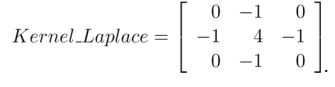

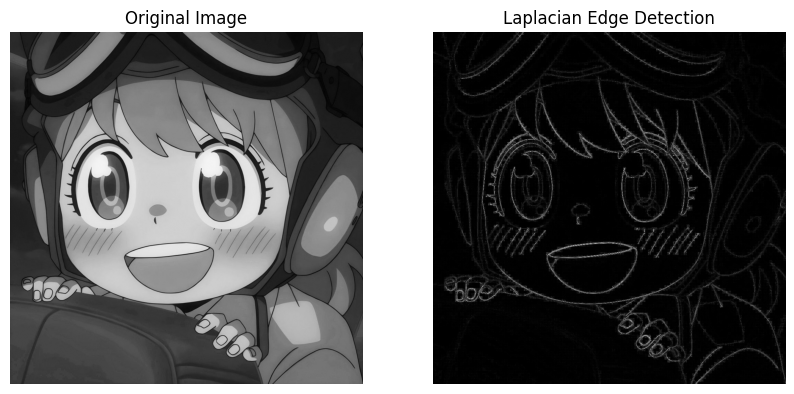

In [13]:
#Q16. Perform the convolution of the original image ImJPG with the Laplace kernel using the function conv2 and save the resulting array as ImJPG Laplace Ensure the image is RGB (3 channels)

import cv2
import numpy as np
import matplotlib.pyplot as plt

def laplacian_edge_detection(image_path):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Check if image is loaded properly
    if image is None:
        print("Error: Could not read the image.")
        return
    
    # Apply the Laplacian operator
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    laplacian = np.uint8(np.absolute(laplacian))
    
    # Display the images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(laplacian, cmap='gray')
    plt.title("Laplacian Edge Detection")
    plt.axis("off")
    
    plt.show()

# Example usage
image_path = r"an11.jpg"  
laplacian_edge_detection(image_path)
